In [2]:
from data import GateDataHandler, BinanceDataHandler
from analysis_utils import AnalysisUtils

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

gdata_handler = GateDataHandler()
bdata_handler = BinanceDataHandler()
analyzer = AnalysisUtils()

### 0. Functions to get klines diff and fr
- On both Binance and Gate
- Diff = (B - G) * 100% / B 

### 1. EDA for AIOT

In [4]:
aiot = analyzer.get_futures_diff('AIOTUSDT', interval='5m', limit=1500)
print(aiot.info())
print(aiot.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2025-05-28 08:45:00 to 2025-06-02 13:40:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b_close   1500 non-null   float64
 1   g_close   1500 non-null   float64
 2   diff_pct  1500 non-null   float64
dtypes: float64(3)
memory usage: 46.9 KB
None
                     b_close  g_close  diff_pct
Date                                           
2025-05-28 08:45:00  0.31070  0.30973  0.003122
2025-05-28 08:50:00  0.31084  0.31033  0.001641
2025-05-28 08:55:00  0.31182  0.31097  0.002726
2025-05-28 09:00:00  0.31212  0.31149  0.002018
2025-05-28 09:05:00  0.31349  0.31241  0.003445


In [5]:
aiot_fr = analyzer.get_futures_fr('AIOTUSDT')
print(aiot_fr.info())
print(aiot_fr.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2025-05-03 16:00:00 to 2025-06-02 12:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   binance_fr  180 non-null    object 
 1   gate_fr     180 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB
None
                      binance_fr   gate_fr
funding_time                              
2025-05-03 16:00:00   0.00159633  0.000379
2025-05-03 20:00:00   0.00246501  0.000296
2025-05-04 00:00:00   0.00042564  0.000179
2025-05-04 04:00:00   0.00005000 -0.000279
2025-05-04 08:00:00  -0.00090057 -0.000053


In [6]:
aiot = analyzer.merge_diff_fr('AIOTUSDT')
print(aiot.head())
print(aiot.info())

                     b_close  g_close  diff_pct binance_fr  gate_fr
Date                                                               
2025-05-28 08:45:00  0.31070  0.30973  0.003122        NaN      NaN
2025-05-28 08:50:00  0.31084  0.31033  0.001641        NaN      NaN
2025-05-28 08:55:00  0.31182  0.31097  0.002726        NaN      NaN
2025-05-28 09:00:00  0.31212  0.31149  0.002018        NaN      NaN
2025-05-28 09:05:00  0.31349  0.31241  0.003445        NaN      NaN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2025-05-28 08:45:00 to 2025-06-02 13:40:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   b_close     1500 non-null   float64
 1   g_close     1500 non-null   float64
 2   diff_pct    1500 non-null   float64
 3   binance_fr  31 non-null     object 
 4   gate_fr     31 non-null     float64
dtypes: float64(4), object(1)
memory usage: 70.3+ KB
None


In [7]:
aiot['diff_pct'].describe()

count    1500.000000
mean        0.001843
std         0.002683
min        -0.010161
25%         0.000135
50%         0.002012
75%         0.003607
max         0.010631
Name: diff_pct, dtype: float64

In [8]:
aiot['diff_pct'].describe()['50%']

0.002012208550594365

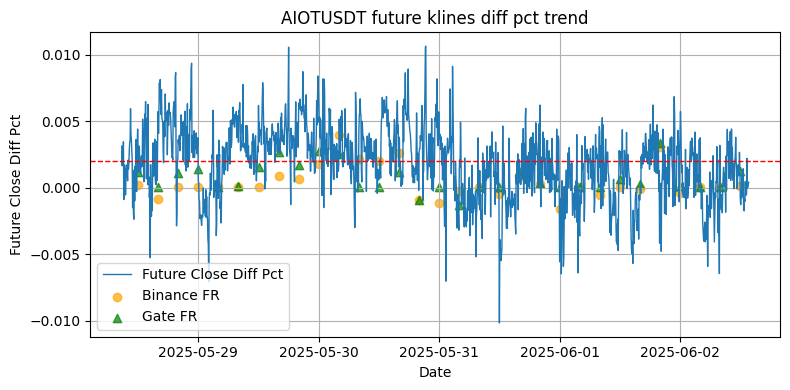

In [9]:
analyzer.plot_diff_fr(aiot, 'AIOTUSDT')

In [10]:
quantile = aiot['diff_pct'].quantile([i/10 for i in range(11)])
quantile.name = 'aiot'
quantile

0.0   -0.010161
0.1   -0.001660
0.2   -0.000349
0.3    0.000517
0.4    0.001317
0.5    0.002012
0.6    0.002636
0.7    0.003290
0.8    0.004026
0.9    0.005230
1.0    0.010631
Name: aiot, dtype: float64

### 2. Kline diff for all symbols

In [10]:
# 获取两个平台的合约
# Gate
gate_symbols = gdata_handler.gate_get_funding_rates()['symbol'].tolist()
gate_symbols = [s.replace("_USDT","USDT") for s in gate_symbols]
print(len(gate_symbols))

# Binance
b_symbol_status = bdata_handler.bi_get_all_contract_status()
trading_symbols = b_symbol_status[b_symbol_status['status']=='TRADING']['symbol'].tolist()
binance_symbols = [s['symbol'] for s in bdata_handler.client.futures_exchange_info()['symbols']]
binance_symbols = [s for s in binance_symbols if s in trading_symbols]
print(len(binance_symbols))

571
460


In [11]:
# 合并上述两个列表，取共同的symbols
mutual_symbols = [s for s in gate_symbols if s in binance_symbols]
print(len(mutual_symbols))

393


In [13]:
description_all = []
for s in mutual_symbols:
    print(f"processing data for {s}...")
    klines = analyzer.get_futures_diff(symbol=s, interval='5m', limit=1500)
    description = klines['diff_pct'].quantile([i/10 for i in range(11)])
    description.name = s
    description_all.append(description)

processing data for LSKUSDT...
processing data for OGUSDT...
processing data for RUNEUSDT...
processing data for JASMYUSDT...
processing data for BAKEUSDT...
processing data for NEOUSDT...
processing data for HOOKUSDT...
processing data for QNTUSDT...
processing data for FLOWUSDT...
processing data for ENSUSDT...
processing data for SNXUSDT...
processing data for IOSTUSDT...
processing data for DEGOUSDT...
processing data for XTZUSDT...
processing data for IDUSDT...
processing data for ALICEUSDT...
processing data for RVNUSDT...
processing data for LQTYUSDT...
processing data for ONTUSDT...
processing data for JOEUSDT...
processing data for VETUSDT...
processing data for BCHUSDT...
processing data for ARUSDT...
processing data for SPELLUSDT...
processing data for ZRXUSDT...
processing data for NEARUSDT...
processing data for YFIUSDT...
processing data for XVSUSDT...
processing data for CELOUSDT...
processing data for CVCUSDT...
processing data for CRVUSDT...
processing data for PEOPLEU

In [14]:
diff_all = pd.concat([d for d in description_all], axis=1)
diff_all = diff_all.T

In [15]:
diff_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, LSKUSDT to LPTUSDT
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0     393 non-null    float64
 1   0.1     393 non-null    float64
 2   0.2     393 non-null    float64
 3   0.3     393 non-null    float64
 4   0.4     393 non-null    float64
 5   0.5     393 non-null    float64
 6   0.6     393 non-null    float64
 7   0.7     393 non-null    float64
 8   0.8     393 non-null    float64
 9   0.9     393 non-null    float64
 10  1.0     393 non-null    float64
dtypes: float64(11)
memory usage: 36.8+ KB


In [16]:
diff_all.columns = ["quantile" + str(i) for i in range(11)]

In [17]:
diff_all.columns

Index(['quantile0', 'quantile1', 'quantile2', 'quantile3', 'quantile4', 'quantile5', 'quantile6', 'quantile7', 'quantile8', 'quantile9', 'quantile10'], dtype='object')

In [18]:
diff_all['range_2_8'] = diff_all['quantile8'] - diff_all['quantile2']
diff_all['range_2_7'] = diff_all['quantile7'] - diff_all['quantile2']

In [12]:
diff_all = pd.read_parquet('DATA/diff_all.parquet')

In [13]:
# symbols with high range
diff_high = diff_all[diff_all['range_2_8']>=0.005]
diff_high

,quantile0,quantile1,quantile2,quantile3,quantile4,quantile5,quantile6,quantile7,quantile8,quantile9,quantile10,range_2_8,range_2_7
DEGOUSDT,-0.013273,-0.002898,-0.001050,0.000000,0.000870,0.001602,0.002367,0.003260,0.004267,0.006083,0.022652,0.005317,0.004310
ZILUSDT,-0.013696,-0.003451,-0.001795,-0.000782,-0.000079,0.000794,0.001561,0.002430,0.003465,0.005069,0.022824,0.005260,0.004225
MAVUSDT,-0.020322,-0.005249,-0.002476,-0.001372,-0.000492,0.000319,0.001104,0.002122,0.003244,0.005365,0.023044,0.005720,0.004598
OGNUSDT,-0.029708,-0.005280,-0.003599,-0.002400,-0.001506,-0.000766,-0.000152,0.000617,0.001553,0.003175,0.023796,0.005152,0.004217
CHRUSDT,-0.014627,-0.004876,-0.002843,-0.001727,-0.000826,-0.000108,0.000694,0.001653,0.002938,0.004616,0.013503,0.005781,0.004496
GHSTUSDT,-0.029962,-0.004232,-0.002428,-0.001155,-0.000220,0.000659,0.001729,0.002952,0.004650,0.008484,0.021319,0.007077,0.005379
NEIROUSDT,-2.071746,-1.988217,-1.929485,-1.851129,-1.818498,-1.791998,-1.765747,-1.728913,-1.676715,-1.633019,-1.537806,0.252770,0.200572
SYSUSDT,-0.017815,-0.004994,-0.003053,-0.001995,-0.001002,-0.000198,0.000652,0.001640,0.002947,0.004562,0.022079,0.006000,0.004693
BIDUSDT,-0.025050,-0.011516,-0.009795,-0.008762,-0.007687,-0.006706,-0.005619,-0.004734,-0.003427,-0.001640,0.011163,0.006369,0.005061
QUICKUSDT,-0.019294,-0.003523,-0.001783,-0.000870,0.000000,0.000894,0.001755,0.002667,0.003926,0.006137,0.025000,0.005708,0.004450


In [ ]:
# diff_all.to_parquet('../DATA/diff_all.parquet')

### 3. Other potential symbols

0.0   -0.036273
0.1   -0.003783
0.2   -0.001299
0.3    0.000142
0.4    0.001331
0.5    0.002484
0.6    0.003762
0.7    0.005263
0.8    0.007355
0.9    0.010942
1.0    0.030380
Name: diff_pct, dtype: float64


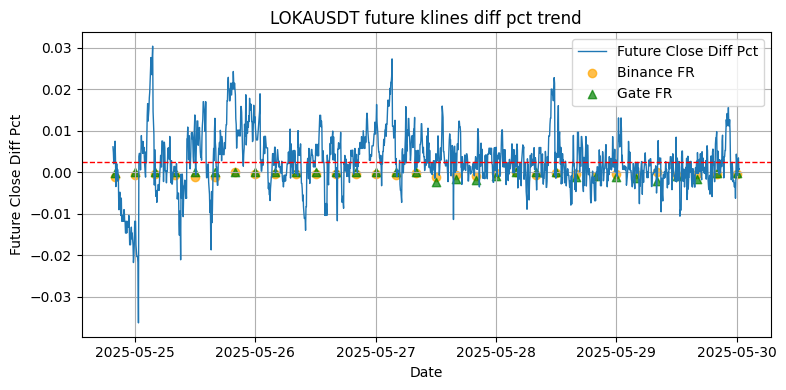

In [ ]:
analyzer.full_analysis(symbol='LOKAUSDT')

0.0   -0.026050
0.1   -0.005878
0.2   -0.003812
0.3   -0.002405
0.4   -0.001306
0.5   -0.000261
0.6    0.000654
0.7    0.001608
0.8    0.003253
0.9    0.006282
1.0    0.019161
Name: diff_pct, dtype: float64


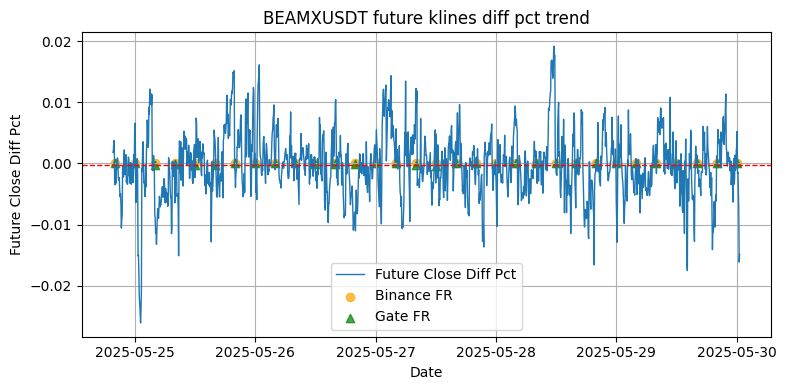

In [ ]:
analyzer.full_analysis('BEAMXUSDT')

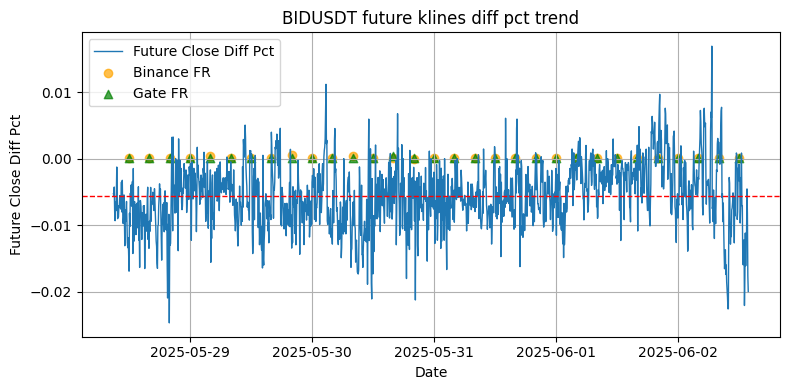

In [14]:
analyzer.full_analysis('BIDUSDT')

0.0   -0.000620
0.1   -0.000102
0.2   -0.000050
0.3   -0.000019
0.4    0.000009
0.5    0.000036
0.6    0.000059
0.7    0.000086
0.8    0.000115
0.9    0.000165
1.0    0.000374
Name: diff_pct, dtype: float64


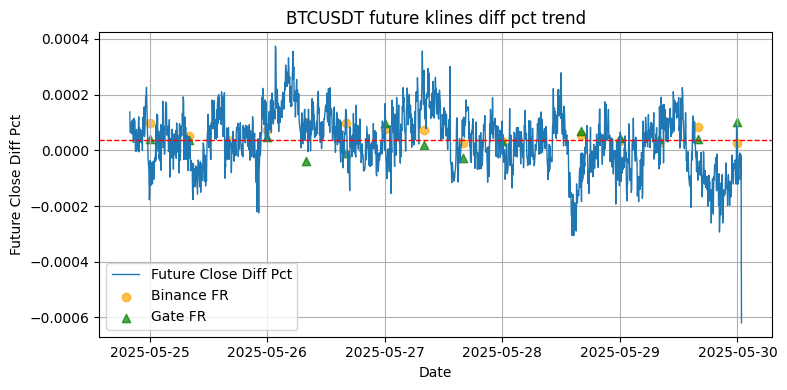

In [ ]:
analyzer.full_analysis('BTCUSDT')